In [1]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **IMPORTING LIBRARIES**

In [117]:
import nibabel as nib
import numpy as np
import os
import itertools
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

## **IMPORTING DATA AFTER CROPPING AND RESIZING FORMAT**

### ANALYSING IMAGE TO CROP
Shape of 3D Image - 141,199,190

In [118]:
data = nib.load('/content/drive/My Drive/brain_stuff/Training/patient/sub1/T1_bet_2_0413.nii.gz').get_data()
data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


(141, 199, 190)

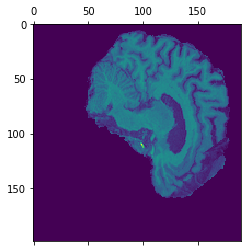

In [120]:
fig,ax = plt.subplots(1)
ax.matshow(data[80,:,:])

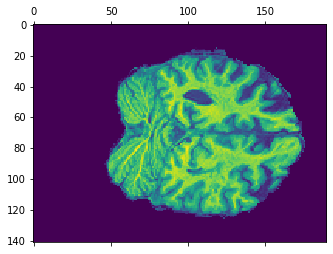

In [121]:
fig,ax = plt.subplots(1)
ax.matshow(data[:,50,:])

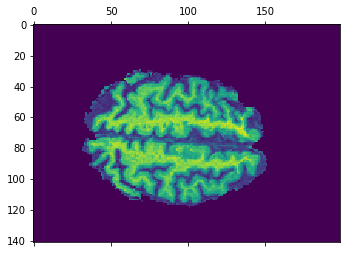

In [122]:
fig,ax = plt.subplots(1)
ax.matshow(data[:,:,160])

### FINDING EDGE OF ALL THE 3D IMAGES

In [123]:
# d = np.sum(trainx, axis=0) where trainx = sum of all train values. 

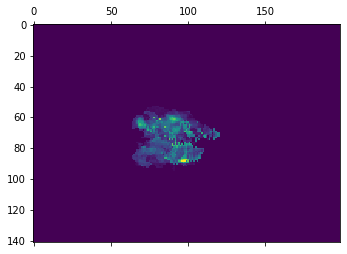

In [124]:
fig,ax = plt.subplots(1)
# 10:130, 3:168, 41:186
ax.matshow(d[:,:,180])

### PREPROCESSING

In [126]:
def resize(image):
    x_old,y_old,z_old = data.shape
    x_new,y_new,z_new = 80,130,100

    delta_x = x_old / x_new
    delta_y = y_old / y_new
    delta_z = z_old / z_new

    resized = np.zeros((80,130,100))

    for x, y, z in itertools.product(range(x_new),
                                     range(y_new),
                                     range(z_new)):
        resized[x][y][z] = data[int(x * delta_x)][int(y * delta_y)][int(z * delta_z)]

    return resized

data_count= {
  "Training" : 10,
  "Testing" : 5
}
def importData(data_category = 'Training', label='health', sub = 1):
  data = nib.load('/content/drive/My Drive/brain_stuff/' + data_category + '/' + label +
                                                 '/sub' + str(sub) + '/T1_bet_2_0413.nii.gz').get_data()[10:130, 3:168, 41:186]
# [10:135,5:165,45:185]
  return np.expand_dims(resize_data(data), axis=-1)
  # return data
def getAllData(category='Training'):
  data = []
  labels = []
  for subject in range(1,data_count[category]+1):
    data.append(importData('Training', 'health', subject))
    labels.append(0)
  for subject in range(1,data_count[category]+1):
    data.append(importData('Training', 'patient', subject))
    labels.append(1)
  return np.array(data), np.array(labels)

### IMPORT TEST DATA

In [127]:
x_train, y_train = getAllData('Training')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys


## **TRAINING**

In [128]:
def buildModel(x):
  model = Sequential()
  model.add(Conv3D(32, kernel_size=5, activation='relu', input_shape=x[0].shape))
  model.add(MaxPooling3D(pool_size=6))
  model.add(BatchNormalization(center=True, scale=True))
  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(lr=0.01, epsilon=0.6),
                metrics=['accuracy'])
  return model

model = buildModel(x_train)
model.fit(trainx, to_categorical(trainy),batch_size=3,epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 115ms/step - loss: 0.8543 - accuracy: 0.3500
Epoch 2/20
7/7 [==============================] - 1s 113ms/step - loss: 1.1741 - accuracy: 0.5500
Epoch 3/20
7/7 [==============================] - 1s 113ms/step - loss: 1.3109 - accuracy: 0.4000
Epoch 4/20
7/7 [==============================] - 1s 113ms/step - loss: 0.6092 - accuracy: 0.6000
Epoch 5/20
7/7 [==============================] - 1s 113ms/step - loss: 0.9617 - accuracy: 0.2500
Epoch 6/20
7/7 [==============================] - 1s 112ms/step - loss: 0.6053 - accuracy: 0.6000
Epoch 7/20
7/7 [==============================] - 1s 113ms/step - loss: 0.5667 - accuracy: 0.6500
Epoch 8/20
7/7 [==============================] - 1s 113ms/step - loss: 0.4754 - accuracy: 0.7500
Epoch 9/20
7/7 [==============================] - 1s 112ms/step - loss: 0.4045 - accuracy: 0.8000
Epoch 10/20
7/7 [==============================] - 1s 113ms/step - loss: 0.2958 - accuracy: 0.8500
Epoch 11/20
7/7 [==

## **TESTING**
Accuracy approximately above 80%

In [129]:
test_x, test_y = getAllData('Testing')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys


In [130]:
prediction = np.argmax(model.predict(test_x), axis=1)

In [132]:
accuracy_score(test_y, prediction)

1.0